# Класифiкацiя за допомогою бiблiотеки Scikit-Learn Python

# Постановка завдання (Варіант 17)
Побудувати моделi класифiкацiї на основi методу опорних векторiв:

- Моделi NuSVC(kernel="poly"). Розглянути рiзнi комбiнацiї гiперпараметрiв nu, degree, coef0 - управляє тим, наскiльки сильно полiноми високого ступеня впливають на модель порiвняно з полiномами
низького ступеня.
- Моделi SVC з рiзними ядрами та зваженими класами для випадку незбалансованих даних (параметр class_weight).
- Побудувати границi рiшень графiчно для кожної з моделей.
- Вивести значення опорних векторiв (атрибут support_vectors_) для моделей.
- Настроїти гiперпараметри nu, degree, С за допомогою перехресної перевiрки.
- Настроїти гiперпараметр probability за допомогою перехресної перевiрки.

In [2]:
import numpy as np

In [3]:
from sklearn.datasets import make_blobs
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0 , 0.0] , [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X1, Y1 = make_blobs(n_samples=[n_samples_1, n_samples_2],        # generate 2d classification dataset
        centers=centers,
        cluster_std=clusters_std,
        random_state=0, shuffle=False)


from sklearn.datasets import load_wine
X2, Y2 = load_wine(return_X_y=True)

## 1. Представити початковi данi графiчно.

In [5]:
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### make_blobs

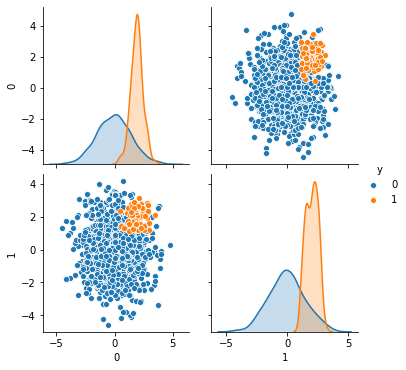

In [6]:
df1 = pd.DataFrame(X1)
df1['y'] = Y1.astype("int")
sns.pairplot(df1, hue='y')

### load_wine

In [7]:
raw_data = load_wine()
features = pd.DataFrame(data=raw_data['data'],columns=raw_data['feature_names'])
data = features
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


#### Теплокарта кореляцій між ознаками

Квадрати з додатніми величинами показують кореляцію між ознаками. Чим більша величина, тим сильніше відношення.

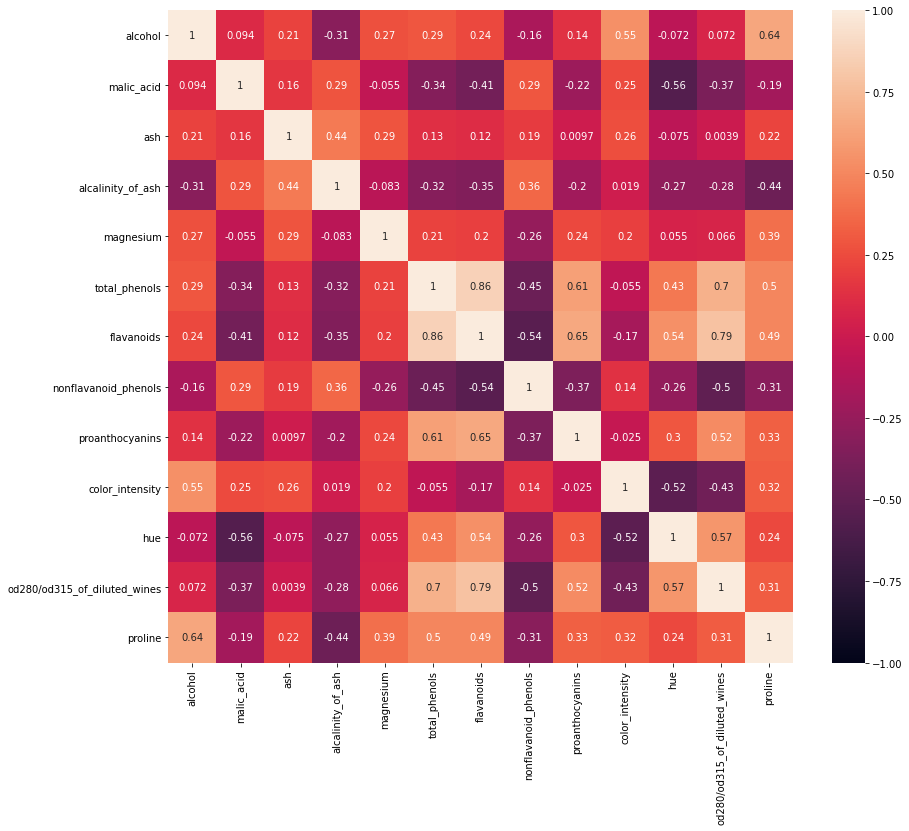

In [8]:
correlation = data.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1)

## 2. Розбити данi на навчальний i перевiрочний набори.

In [9]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

## 3-8. Побудувати моделi класифiкацiї або регресiї згiдно з варiантом та
- Представити моделi графiчно.
- Виконати прогнози на основi моделей.
- Для кожної з моделей оцiнити, чи має мiсце перенавчання.
- Розрахувати додатковi результати моделей, наприклад, апостерiорнi iмовiрностi, опорнi вектори або iншi (згiдно з варiантом).
- Для задач класифiкацiї розрахувати критерiї якостi для кожної моделi:
  -  матрицю неточностей (confusion matrix),
  -  точнiсть (precision),
  -  повноту (recall),
  -  мiру F1 (F1 score),
  -  побудувати криву точностi-повноти (precision-recall (PR) curve), ROCкриву, показник AUC.

In [10]:
from sklearn.svm import NuSVC, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve 

### make_blobs dataset

In [11]:
def metrics1(true, predict, probs):
    #критерiї якостi для кожної моделi
    print("Confusion Matrix:\n", confusion_matrix(true, predict))
    print("Precision score: ", precision_score(true, predict))
    print("Recall score: ", recall_score(true, predict))
    print("F1 score: ", f1_score(true, predict))
    
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(true, probs)
    auc = roc_auc_score(true, probs)
    print(f"AUC score: {auc}")
    # ROC curve
    plt.plot(fpr, tpr)
    plt.title("ROC Curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    # PR Curve
    precision, recall, _ = precision_recall_curve(true, probs)
    plt.plot(recall, precision)
    plt.title("PR Curve")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

In [12]:
def overfitting(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    train_f1 = f1_score(y_train, clf.predict(X_train))
    test_f1 = f1_score(y_test, clf.predict(X_test))
    
    if train_f1 > test_f1:
        print(f"Overfitting {train_f1} >{test_f1}")
    else:
        print(f"Underfitting, {train_f1} < {test_f1}")  

In [13]:
def plot_dec(X, y, clf, print_vectors=False):
    h = .02  # step size in the mesh

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors

    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


    clf.fit(X, y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()
    if print_vectors:
        try:
            print(clf.support_vectors_)
        except:
            pass 

### make_blobs dataset NuSVC

In [14]:
for nu in np.arange(0, 1, 0.1):
     clf = NuSVC(nu=nu, kernel="poly", probability = True, degree = 3)
     try:
         clf.fit(X1_train, y1_train)
     except ValueError as e:
         print("nu {} not feasible".format(nu))

nu 0.0 not feasible
nu 0.2 not feasible
nu 0.30000000000000004 not feasible
nu 0.4 not feasible
nu 0.5 not feasible
nu 0.6000000000000001 not feasible
nu 0.7000000000000001 not feasible
nu 0.8 not feasible
nu 0.9 not feasible


Confusion Matrix:
 [[193  11]
 [  0  16]]
Precision score:  0.5925925925925926
Recall score:  1.0
F1 score:  0.7441860465116279
AUC score: 0.9810049019607844


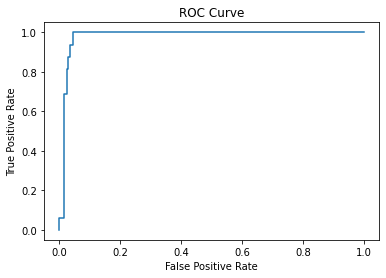

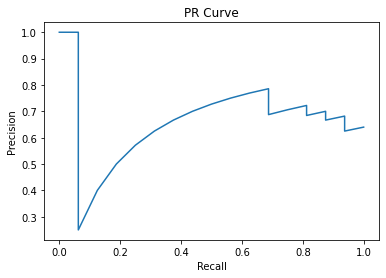

Underfitting, 0.7311827956989246 < 0.7441860465116279


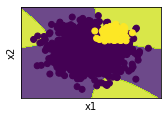

In [15]:
clf = NuSVC(nu=0.1, kernel="poly", probability = True, degree = 3)
clf.fit(X1_train, y1_train)
metrics1(y1_test, clf.predict(X1_test), probs=clf.predict_proba(X1_test))
overfitting(clf, X1_train, y1_train, X1_test, y1_test)
plot_dec(X1, Y1, clf, print_vectors=False)

Confusion Matrix:
 [[173  31]
 [  4  12]]
Precision score:  0.27906976744186046
Recall score:  0.75
F1 score:  0.4067796610169491
AUC score: 0.1332720588235294


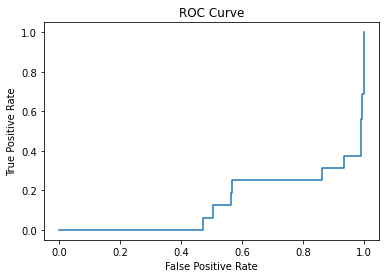

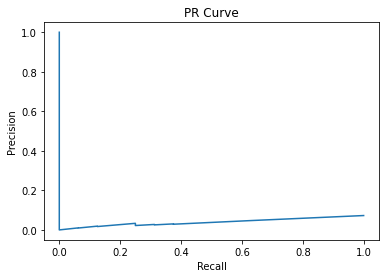

Overfitting 0.44621513944223107 >0.4067796610169491


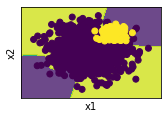

In [16]:
clf = NuSVC(nu=0.1, kernel="poly", probability = True, degree = 4)
clf.fit(X1_train, y1_train)
metrics1(y1_test, clf.predict(X1_test), probs=clf.predict_proba(X1_test))
overfitting(clf, X1_train, y1_train, X1_test, y1_test)
plot_dec(X1, Y1, clf, print_vectors=False)

### make_blobs dataset SVC

Confusion Matrix:
 [[184  20]
 [  0  16]]
Precision score:  0.4444444444444444
Recall score:  1.0
F1 score:  0.6153846153846153
AUC score: 0.9862132352941176


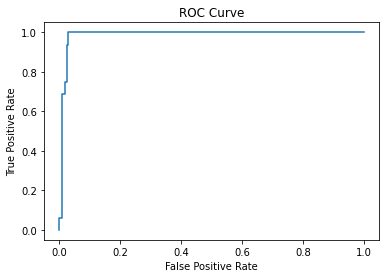

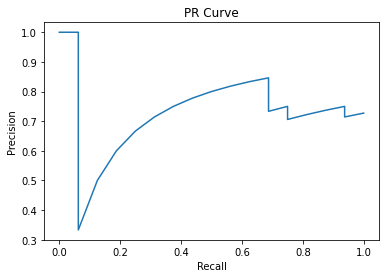

Overfitting 0.7655502392344498 >0.6153846153846153


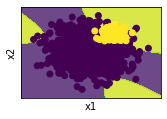

In [17]:
clf_t = SVC(kernel="poly", probability = True, class_weight = 'balanced')
clf_t.fit(X1_train, y1_train)
metrics1(y1_test, clf_t.predict(X1_test), probs=clf_t.predict_proba(X1_test))
overfitting(clf_t, X1_train, y1_train, X1_test, y1_test)
plot_dec(X1, Y1, clf_t, print_vectors=False)

Confusion Matrix:
 [[176  28]
 [  0  16]]
Precision score:  0.36363636363636365
Recall score:  1.0
F1 score:  0.5333333333333333
AUC score: 0.9770220588235294


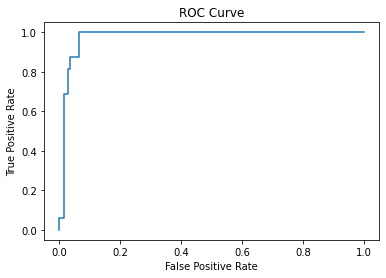

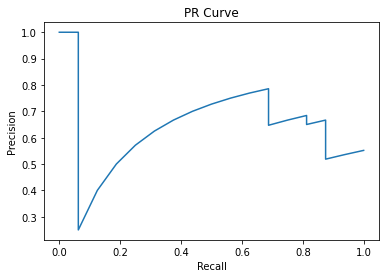

Overfitting 0.6612244897959183 >0.5333333333333333


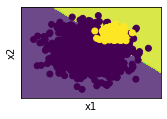

In [18]:
clf_l = SVC(kernel="linear", probability = True, class_weight = 'balanced')
clf_l.fit(X1_train, y1_train)
metrics1(y1_test, clf_l.predict(X1_test), probs=clf_l.predict_proba(X1_test))
overfitting(clf_l, X1_train, y1_train, X1_test, y1_test)
plot_dec(X1, Y1, clf_l, print_vectors=False)

### load_wines dataset 

In [19]:
from sklearn.metrics import classification_report

In [20]:
def metrics2(true, predict):
    #критерiї якостi для кожної моделi
    print("Confusion Matrix:\n", confusion_matrix(true, predict))
    print("\n", classification_report(true, predict))
    

In [21]:
def overfitting2(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)  
    train_f1 = f1_score(y_train, clf.predict(X_train), average='micro')
    test_f1 = f1_score(y_test, clf.predict(X_test), average='micro')
    if train_f1 > test_f1:
        print(f"Overfitting {train_f1} >{test_f1}")
    else:
        print(f"Underfitting, {train_f1} < {test_f1}")      

### load_wines dataset NuSVC

In [22]:
for nu in np.arange(0, 1, 0.1):
     clf = NuSVC(nu=nu, kernel="poly", probability = True, degree = 3)
     try:
         clf.fit(X2_train, y2_train)
     except ValueError as e:
         print("nu {} not feasible".format(nu))

nu 0.0 not feasible
nu 0.9 not feasible


In [23]:
clf = NuSVC(nu=0.7, kernel="poly", probability = True, degree = 3)
clf.fit(X2_train, y2_train)
metrics2(y2_test, clf.predict(X2_test))
overfitting2(clf, X2_train, y2_train, X2_test, y2_test)

Confusion Matrix:
 [[12  2  0]
 [ 0 14  0]
 [ 0  2  6]]

               precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.78      1.00      0.88        14
           2       1.00      0.75      0.86         8

    accuracy                           0.89        36
   macro avg       0.93      0.87      0.89        36
weighted avg       0.91      0.89      0.89        36

Underfitting, 0.7605633802816902 < 0.8888888888888888


In [24]:
clf = NuSVC(nu=0.7, kernel="poly", probability = True, degree = 4)
clf.fit(X2_train, y2_train)
metrics2(y2_test, clf.predict(X2_test))
overfitting2(clf, X2_train, y2_train, X2_test, y2_test)

Confusion Matrix:
 [[ 9  5  0]
 [ 0 14  0]
 [ 0  3  5]]

               precision    recall  f1-score   support

           0       1.00      0.64      0.78        14
           1       0.64      1.00      0.78        14
           2       1.00      0.62      0.77         8

    accuracy                           0.78        36
   macro avg       0.88      0.76      0.78        36
weighted avg       0.86      0.78      0.78        36

Underfitting, 0.6901408450704225 < 0.7777777777777778


### load_wines dataset SVC

In [25]:
clf_w = SVC(kernel="poly", probability = True, class_weight = 'balanced')
clf_w.fit(X2_train, y2_train)
metrics2(y2_test, clf_w.predict(X2_test))
overfitting2(clf_w, X2_train, y2_train, X2_test, y2_test)

Confusion Matrix:
 [[14  0  0]
 [ 0 10  4]
 [ 1  4  3]]

               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.71      0.71      0.71        14
           2       0.43      0.38      0.40         8

    accuracy                           0.75        36
   macro avg       0.69      0.70      0.69        36
weighted avg       0.74      0.75      0.74        36

Underfitting, 0.6901408450704225 < 0.75


In [26]:
clf = SVC(kernel="linear", probability = True, class_weight = 'balanced')
clf.fit(X2_train, y2_train)
metrics2(y2_test, clf.predict(X2_test))
overfitting2(clf, X2_train, y2_train, X2_test, y2_test)

Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Underfitting, 0.9929577464788732 < 1.0


## 9. Настроїти гiперпараметри nu, degree, С за допомогою перехресної перевiрки. Настроїти гiперпараметр probability за допомогою перехресної перевiрки. Для кожної навчальної вибiрки вибрати найкращу модель.

In [27]:
parameter_candidates_nu = [
  {'nu': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 'degree': [1, 2, 3, 4], 'probability':[True, False]}]

parameter_candidates = [
  {'C': [0.01, 0.1, 1, 10, 100]}]

#### make_blobs dataset

In [29]:
clf1_n = GridSearchCV(estimator=NuSVC(), param_grid=parameter_candidates_nu, n_jobs=-1)
clf1_n.fit(X1_train, y1_train)  
print(f"Best parameters: {clf1_n.best_params_}")
print(f"Best score: {clf1_n.best_score_}")

Best parameters: {'degree': 1, 'nu': 0.1, 'probability': True}
Best score: 0.9670454545454547


In [30]:
clf1 = GridSearchCV(estimator=SVC(), param_grid=parameter_candidates, n_jobs=-1)
clf1.fit(X1_train, y1_train)  
print(f"Best parameters: {clf1.best_params_}")
print(f"Best score: {clf1.best_score_}")

Best parameters: {'C': 10}
Best score: 0.9670454545454547


#### load_wines dataset

In [31]:
clf2_w = GridSearchCV(estimator=SVC(), param_grid=parameter_candidates, n_jobs=-1)
clf2_w.fit(X2_train, y2_train)  
print(f"Best parameters: {clf2_w.best_params_}")
print(f"Best score: {clf2_w.best_score_}")

Best parameters: {'C': 100}
Best score: 0.7187192118226602


In [32]:
clf2 = GridSearchCV(estimator=NuSVC(), param_grid=parameter_candidates_nu, n_jobs=-1)
clf2.fit(X2_train, y2_train)  
print(f"Best parameters: {clf2.best_params_}")
print(f"Best score: {clf2.best_score_}")

Best parameters: {'degree': 1, 'nu': 0.4, 'probability': True}
Best score: 0.8233990147783251


## 10. Навчити моделi на пiдмножинах навчальних даних. Оцiнити, наскiльки розмiр навчальної множини впливає на якiсть моделi.

In [33]:
from sklearn.model_selection import learning_curve

#### make_blobs dataset

In [33]:
train_sizes1, train_scores1, test_scores1 = learning_curve(clf_l, X1_test, y1_test, train_sizes=np.arange(1, 188), cv=7, n_jobs=-1)

In [34]:
train_sizes2, train_scores2, test_scores2 = learning_curve(clf1, X1_test, y1_test, train_sizes=np.arange(1, 188), cv=7, n_jobs=-1)

Text(0.5, 1.0, 'Default model')

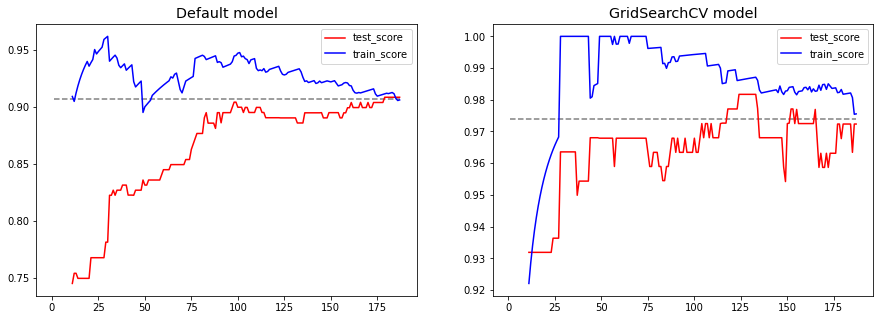

In [35]:
_, axes = plt.subplots(1, 2, figsize=(15,5))

axes[1].plot(train_sizes2, np.mean(test_scores2, 1), color='red', label='test_score')
axes[1].plot(train_sizes2, np.mean(train_scores2, 1), color='blue', label='train_score')
axes[1].hlines(np.mean([train_scores2[-1], test_scores2[-1]]), train_sizes2[0], train_sizes2[-1], color='grey', linestyle='dashed')
axes[1].legend(loc=0)
axes[1].set_title('GridSearchCV model', size='x-large')

axes[0].plot(train_sizes1, np.mean(test_scores1, 1), color='red', label='test_score')
axes[0].plot(train_sizes1, np.mean(train_scores1, 1), color='blue', label='train_score')
axes[0].hlines(np.mean([train_scores1[-1], test_scores1[-1]]), train_sizes1[0], train_sizes1[-1], color='grey', linestyle='dashed')
axes[0].legend(loc=0)
axes[0].set_title('Default model', size='x-large')

Обидві моделі ведуть себе приблизно однаково і збігаються до однієї міри точності. Друга модель може давати кращі результати.

#### load_wines dataset

In [39]:
train_sizes1, train_scores1, test_scores1 = learning_curve(clf_w, X2_test, y2_test, train_sizes=np.arange(1, 30), cv=7, n_jobs=-1)

In [40]:
train_sizes2, train_scores2, test_scores2 = learning_curve(clf2_w, X2_test, y2_test, train_sizes=np.arange(1, 30), cv=7, n_jobs=-1)

Text(0.5, 1.0, 'Default model')

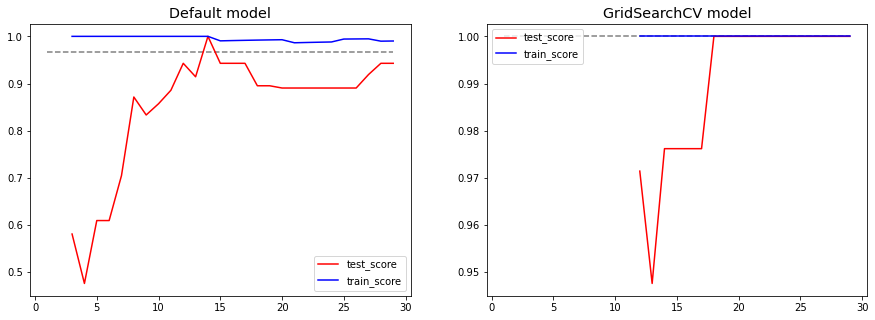

In [41]:
_, axes = plt.subplots(1, 2, figsize=(15,5))

axes[1].plot(train_sizes2, np.mean(test_scores2, 1), color='red', label='test_score')
axes[1].plot(train_sizes2, np.mean(train_scores2, 1), color='blue', label='train_score')
axes[1].hlines(np.mean([train_scores2[-1], test_scores2[-1]]), train_sizes2[0], train_sizes2[-1], color='grey', linestyle='dashed')
axes[1].legend(loc=0)
axes[1].set_title('GridSearchCV model', size='x-large')

axes[0].plot(train_sizes1, np.mean(test_scores1, 1), color='red', label='test_score')
axes[0].plot(train_sizes1, np.mean(train_scores1, 1), color='blue', label='train_score')
axes[0].hlines(np.mean([train_scores1[-1], test_scores1[-1]]), train_sizes1[0], train_sizes1[-1], color='grey', linestyle='dashed')
axes[0].legend(loc=0)
axes[0].set_title('Default model', size='x-large')

Бачимо, що крива навчання для Default model стає близькою до кривої перевiрки при певному значеннi розмiру навчальної множини. Додавання нових навчальних прикладiв не тільки iстотно не покращують результати, але й відбуваеться погіршення.
Полiпшити оцiнку кривої навчання, яка вже зiйшлася, можна лише використанням GridSearchCV model. 

### end